##### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

In [2]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

## Synthetic data

In [3]:
# TODO add a final completely random rotation element (same across whole
# measurement sequence) to represent the fact that we don't know where
# gravity is pointing relative to the sensor


def generate_stationary_noise(length):
    """Generate random normally distributed accelerometer measurements
    representing the noise experienced by a stationary sensor."""
    return np.random.normal(0, 1, (length, 3))


#def generate_linear_data(length):
#    """Generate normally distributed random data representing linear
#    acceleration along a vector, like a dumbbell squat."""
#    # TODO this doesn't look right
#    movement_vector = (np.random.random(3) - 0.5) * 2
#    movement_vectors = np.tile(movement_vector, (length, 1))
#    random_scalars = np.random.normal(0, 1, length)
#    angular_v = movement_vectors * random_scalars[:, None]
#    return angular_v

def generate_linear_data(length):
    pass


def generate_circular_data(length, radius=1, angle=2 * np.pi):
    """Generate acceleration data representing 2D circular motion,
    like a dumbbell curl."""
    # TODO also add the rising edge of the exercise

    # Generate x and y coordinates of an arc segment (no z yet)
    angular_v = np.zeros((length, 3))
    angular_v[:, 0] = radius * np.cos(np.linspace(0, angle, length))
    angular_v[:, 1] = radius * np.sin(np.linspace(0, angle, length))

    # Do some rotations to simulate the motion of a dumbbell curl
    # Rotate 0.53pi radians about z counterclockwise
    theta_z = -0.53 * np.pi
    R_z = np.array(
        [
            [np.cos(theta_z), -np.sin(theta_z), 1],
            [np.sin(theta_z), np.cos(theta_z), 0],
            [0, 0, 1],
        ]
    )

    # Flip about y
    theta_y = -np.pi
    R_y = np.array(
        [
            [np.cos(theta_y), 0, np.sin(theta_y)],
            [0, 1, 0],
            [-np.sin(theta_y), 0, np.cos(theta_y)],
        ]
    )

    R = np.dot(R_z, R_y)
    angular_v = np.dot(angular_v, R)

    return angular_v

### Synthetic dumbbell curl

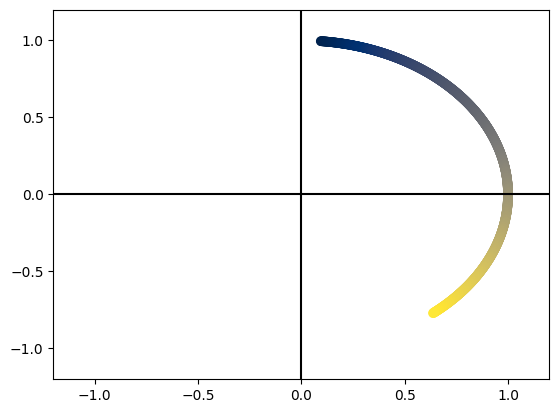

In [4]:
curl_down = generate_circular_data(1000, angle=0.75*np.pi)

# Four-quadrant XY plot
# Plot points in scatter wiht changing colour to indicate direction
plt.scatter(curl_down[:, 0], curl_down[:, 1], c=np.linspace(0, 1, len(curl_down)), cmap="cividis")
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axvline(0, color="black")
plt.axhline(0, color="black")
plt.show()

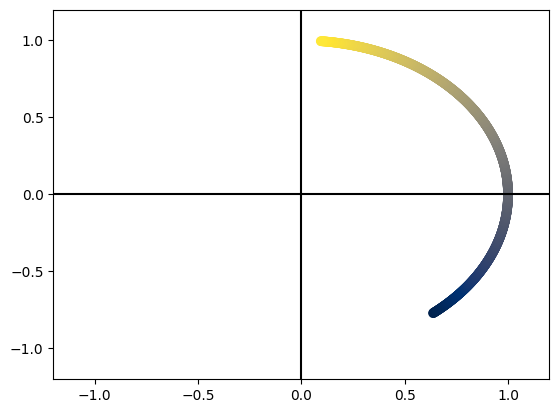

In [5]:
curl_up = curl_down[::-1, :]

# Four-quadrant XY plot
# Plot points in scatter wiht changing colour to indicate direction
plt.scatter(curl_up[:, 0], curl_up[:, 1], c=np.linspace(0, 1, len(curl_up)), cmap="cividis")
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axvline(0, color="black")
plt.axhline(0, color="black")
plt.show()

/home/sam/.local/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


TypeError: 'NoneType' object is not subscriptable

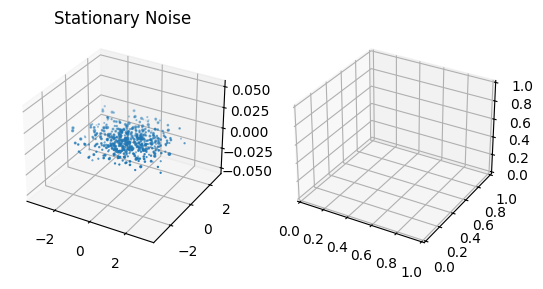

In [6]:
# Testing all three generation types
noise = generate_stationary_noise(1000)
linear = generate_linear_data(1000)
circular = generate_circular_data(1000, angle=0.5 * np.pi)
plt.subplot(1, 2, 1, projection="3d")
plt.scatter(noise[:, 0], noise[:, 1], noise[:, 2])
plt.title("Stationary Noise")
plt.subplot(1, 2, 2, projection="3d")
plt.scatter(linear[:, 0], linear[:, 1], linear[:, 2])
plt.title("Linear Acceleration")
plt.show()

### Synthetic squat

# Experiment

## Load data & true hypotheses

In [ ]:
synth_df = pd.read_csv("./data/sam/synth_01.csv")
curls_df = pd.read_csv("./data/sam/Curls_3x10_7kg-2024-01-25_16-55-30/TotalAcceleration.csv")
squat_df = pd.read_csv("./data/sam/Squats_3x8_7kg-2024-01-25_17-00-38/TotalAcceleration.csv")

NameError: name 'pd' is not defined

## Trim data to relevant periods

## Compute test statistics for data

In [ ]:
def SSM(vector):
    """ Skew-symmetric vector such that something something (TODO) """
    return np.array(
        [
            [0, -vector[2], vector[1]],
            [vector[2], 0, -vector[1]],
            [vector[1], vector[0], 0],
        ]
    )


def compute_test_statistics(measurements):
    Ts = []

    for measurement in measurements:
        M = SSM(measurement).T * SSM(measurement)
        eigs, _ = np.linalg.eig(M)
        min_eig = min(eigs)
        Ts.append(min_eig)

    return np.array(Ts)


measurements = np.random.rand(1000, 3)

Ts = compute_test_statistics(measurements)
Ts

array([-0.34915519, -0.70339684, -0.02560235, -0.12947552, -0.16721288,
       -0.88397236, -0.18853512, -0.96737153, -0.79626567, -0.24302919,
       -1.00561782, -0.50761294, -0.3269867 , -0.50850677, -0.82895611,
       -0.49902589, -0.11311704, -0.75047695, -0.70902924, -0.87842556,
       -0.90703936, -0.23396066, -0.22253373, -0.6897811 , -0.96616158,
       -0.17817212, -0.093615  , -0.6121641 , -0.72489886, -0.8595265 ,
       -0.37963527, -0.82970226, -0.32917076, -0.72049585, -0.36623857,
       -0.40023441, -0.22005673, -0.52551656, -0.4903315 , -0.08239574,
       -0.51843015, -1.20917972, -1.01486346, -0.58813283, -0.26619566,
       -0.09206511, -0.07677667, -0.46980444, -0.04479574, -0.52968883,
       -0.38428561, -0.60081356, -0.14484499, -0.12015335, -0.68873455,
       -0.02440157, -0.9210515 , -0.37553607, -0.61738975, -0.49312354,
       -0.45679401, -0.55969921, -0.99176787, -0.17655663, -0.38124008,
       -0.19288081, -0.41042218, -0.36810092, -1.12922189, -0.18

## Select threshold value $\gamma$ with best accuracy

In [ ]:
# Grid search threshold
gammas = np.linspace(-5, 5, 100)

# Select the threshold that yields the best accuracy